In [5]:
import numpy as np
import pandas as pd
import seaborn as snd
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Adsorption_Data.csv')

In [7]:
df

,C(x1),H(x2),N(x3),Si(x4),BET(x5),Adorption Capacity(output)
0,12.8,1.16,0.38,7.51,8.75,0.144
1,6.5,0.57,0.04,3.34,3.69,0.334
2,8.7,0.54,0.21,40.98,33.37,0.452
3,3.5,0.35,0.12,22.05,7.55,0.333
4,7.2,0.71,0.03,3.16,1.97,0.383
5,9.7,0.98,0.34,58.88,58.00,0.366
6,10.9,0.74,0.32,6.07,46.00,0.544
7,2.5,0.32,0.17,28.01,22.00,0.436
8,58.6,2.10,0.38,0.38,38.03,1.160
9,69.1,1.77,0.86,0.53,111.00,2.400


In [8]:
#checking is their any null element 
df.isnull().sum()
df['Adorption Capacity(output)']

0      0.144
1      0.334
2      0.452
3      0.333
4      0.383
5      0.366
6      0.544
7      0.436
8      1.160
9      2.400
10     1.900
11     1.200
12     3.260
13     2.800
14     5.690
15     0.060
16     0.100
17     2.840
18     8.720
19     1.440
20     4.270
21     1.550
22     1.640
23     0.360
24     1.650
25    19.500
26     1.060
27     2.330
28     1.230
29     0.720
30     3.630
31     1.200
32     0.490
33     0.640
34    34.200
Name: Adorption Capacity(output), dtype: float64

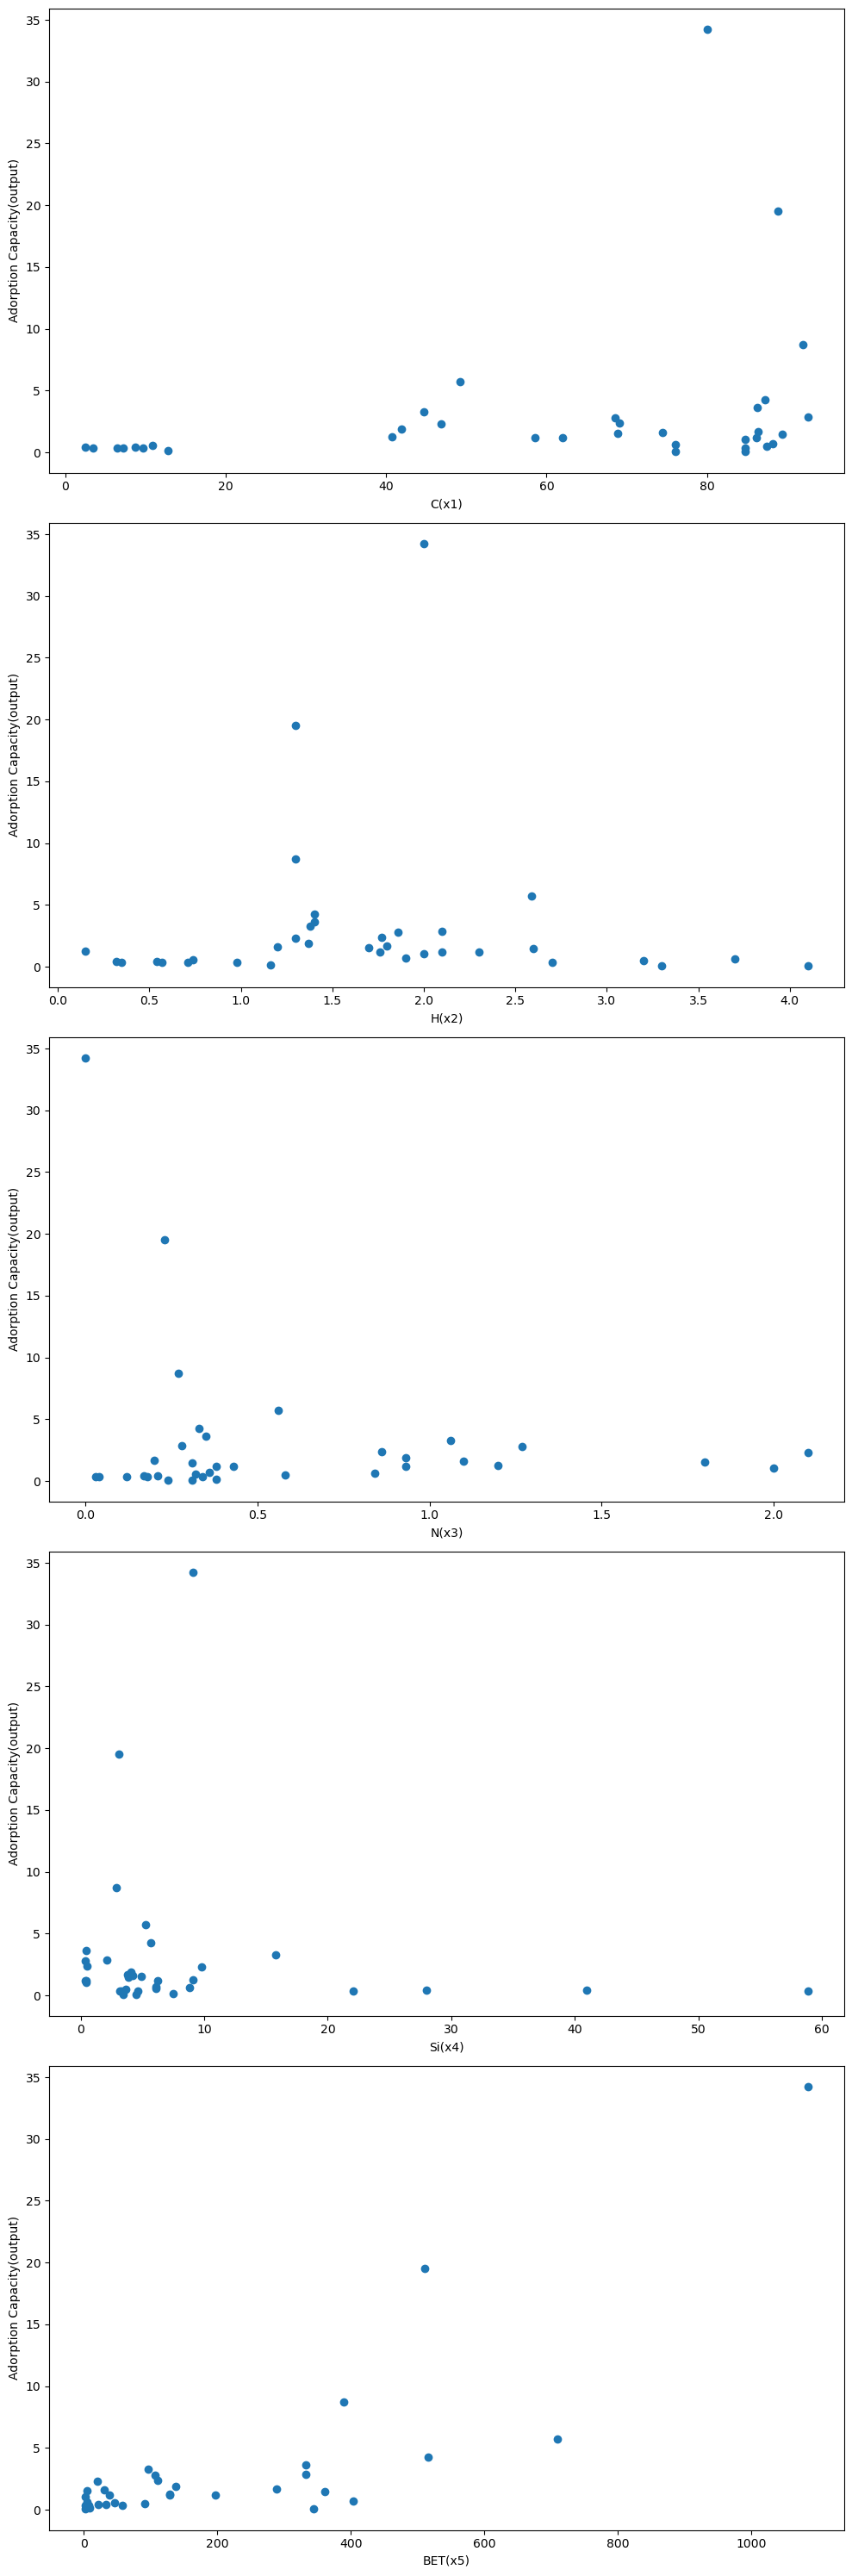

In [9]:
fig, axs = plt.subplots(nrows=len(df.columns)-1, ncols=1, figsize=(10,30))

for i, column in enumerate(df.columns[:-1]):
    axs[i].scatter(df[column], df['Adorption Capacity(output)'])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Adorption Capacity(output)')

plt.tight_layout()
plt.show()

In [10]:
X = df.drop('Adorption Capacity(output)',axis=1).values
Y = df['Adorption Capacity(output)'].values

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
X_train =  torch.FloatTensor(X_train)
X_test =  torch.FloatTensor(X_test)
y_train =  torch.FloatTensor(y_train)
y_test =  torch.FloatTensor(y_test)

In [20]:
class ANN_Model(nn.Module) : 
    def __init__(self,input_features=5,hidden1=20,hidden2=20,out_features=28):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [21]:
torch.manual_seed(20)
model=ANN_Model()

In [22]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=5, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=28, bias=True)
)>

In [23]:
loss_function=nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [48]:
epochs = 500 
final_loss = []
for i in range(epochs):
    y_predic = []
    i=i+1
    y_pred=model.forward(X_train)
    y_predic.append(y_pred)
    loss = loss_function(y_pred,y_train)
    final_loss.append(loss)
    if i%10==0:
        print("Epoch number : {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
     

Epoch number : 10 and the loss : 0.04809145629405975
Epoch number : 20 and the loss : 0.03765545412898064
Epoch number : 30 and the loss : 0.030229507014155388
Epoch number : 40 and the loss : 0.026113003492355347
Epoch number : 50 and the loss : 0.026144864037632942
Epoch number : 60 and the loss : 0.024842118844389915
Epoch number : 70 and the loss : 0.02415507845580578
Epoch number : 80 and the loss : 0.023908615112304688
Epoch number : 90 and the loss : 0.022984042763710022
Epoch number : 100 and the loss : 0.022883709520101547
Epoch number : 110 and the loss : 0.09740041196346283
Epoch number : 120 and the loss : 0.11433632671833038
Epoch number : 130 and the loss : 0.09243733435869217
Epoch number : 140 and the loss : 0.05008170008659363
Epoch number : 150 and the loss : 0.02769768051803112
Epoch number : 160 and the loss : 0.027163797989487648
Epoch number : 170 and the loss : 0.022571077570319176
Epoch number : 180 and the loss : 0.022128675132989883
Epoch number : 190 and the 

In [50]:
prediction=[]
true_val=[]
for i in range(len(X_test)):
    pred=model(X_test[i])
    true_value=y_test[i]
    prediction.append(pred.tolist())
    true_val.append(true_value.item())
for i in range(len(X_test)):
    print("Predicted value = ",prediction[i])
    print("corresponding true value= ",true_val[i])

Predicted value =  [0.44624820351600647, 1.1866158246994019, 2.2749314308166504, 18.867996215820312, 33.09233856201172, 0.3617539405822754, 1.062882423400879, 3.4952566623687744, 1.1214584112167358, 2.7434167861938477, 0.40676364302635193, 2.8107597827911377, 5.378340721130371, 1.161635398864746, 1.46359121799469, 0.31448933482170105, 3.1595113277435303, 0.6097469925880432, 0.39058202505111694, 0.3344931900501251, 8.474191665649414, 1.519225001335144, 1.4006075859069824, 2.354902982711792, 0.3860769271850586, 0.7160657644271851, 0.34561780095100403, 0.21456114947795868]
corresponding true value=  0.7200000286102295
Predicted value =  [0.439415842294693, 1.168825387954712, 2.231204032897949, 18.3969669342041, 32.33017349243164, 0.36554062366485596, 1.0335795879364014, 3.4108521938323975, 1.1088420152664185, 2.7016849517822266, 0.3856431841850281, 2.736267328262329, 5.282802581787109, 1.1517000198364258, 1.4752072095870972, 0.3038940131664276, 3.093456745147705, 0.5782859325408936, 0.393